# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import time
from lightkurve import TessLightCurve
import matplotlib.pyplot as plt
%matplotlib inline

import triceratops.triceratops as tr

# User Inputs

* **ID** = TIC ID of selected target  
* **sectors** = Observational sector of TESS  


* **period** = Orbital Period  
* **tdepth** = Transit Depth  


* **lc** = Light curve file  
* **contrastcurve_file** = Contrast curve file  


* **band** = Band of filter through which CC file was created. (TESS, Vis, J, H, K)  
From table below we can identify which band to choose.  

|   Wavelength   | Central Wavelength | Filter |
|:--------------:|:------------------:|:------:|
|  600 - 1000 nm | 786.5 nm           |  TESS  |
|   400 - 800 nm | 550 nm             |   Vis  |
| 1000 - 1500 nm | 1250 nm            |   J    |
| 1400 - 2000 nm | 1650 nm            |   H    |
| 1800 - 2600 nm | 2200 nm            |   K    |

* We usually encounter with following wavelengths,  
 - **562 nm** : Vis filter  
 - **832 nm** : TESS filter  
 - **Br-Gamma** (2172 - 2202 nm) : K filter
 - **Jcont** (1190 - 1230 nm) : J filter

# I/P

* *Use these values for input*  

  - **Sector 27:**  
Period = 2.9359949081  
tdepth = 0.0747021797**2
   
  - **Sector 28:**  
Period = 2.9359936583   
tdepth = 0.0742674780**2

  - **Sector 29:**  
Period = 2.9360003741     
tdepth = 0.0750261386**2
   
  - **Sector 30:**  
Period = 2.9360669468   
tdepth = 0.0800768426**2

  - **Sector 31:**  
Period = 2.9360061460  
tdepth = 0.0811082809**2
   
  - **Sector 32:**  
Period = 2.9360261768   
tdepth = 0.0746569594**2

  - **Sector 33:**  
Period = 2.9360341051    
tdepth = 0.0769352173**2
   
  - **Sector 34:**  
Period = 2.9360729090     
tdepth = 0.0710458244**2

  - **Sector 36:**  
Period = 2.9360276797       
tdepth = 0.0768846797**2
   
  - **Sector 37:**  
Period = 2.9360894735   
tdepth = 0.0736750091**2

  - **Sector 38:**  
Period = 2.9360179354  
tdepth = 0.0802281783**2
   
  - **Sector 39:**  
Period = 2.9360918991  
tdepth = 0.0802920898**2

In [12]:
ID = 142105158
sectors = np.array([28])

period = 2.9359936583
tdepth = 0.0742674780**2

lc = pd.read_csv("TOI_2200_28.csv", header=None)

# Downloading & Visualizing Data

In [3]:
target = tr.target(ID=ID, sectors=sectors)

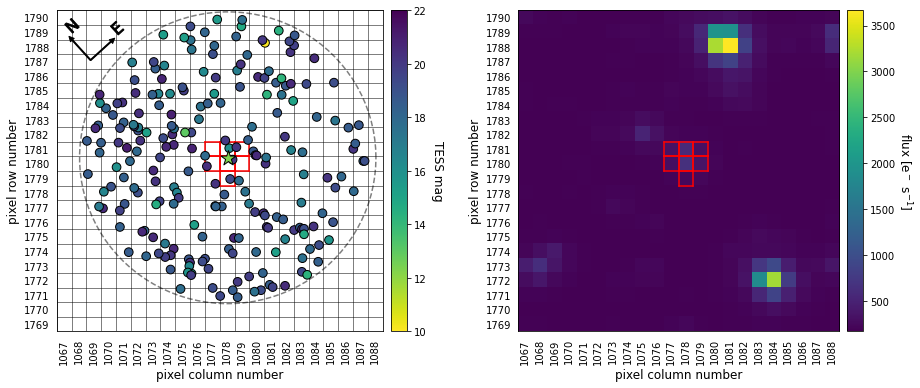

,ID,Tmag,Jmag,Hmag,Kmag,ra,dec,mass,rad,Teff,plx,sep (arcsec),PA (E of N)
0,142105158,12.3181,11.489,11.018,10.958,98.783288,-72.456799,0.85,0.826247,5070.0,3.951320,0.000,0.000
1,735385479,20.0817,NaN,NaN,NaN,98.786253,-72.458592,NaN,NaN,NaN,NaN,7.215,153.516
2,142105159,16.1079,15.013,14.331,14.235,98.793251,-72.454365,0.69,0.754011,4423.0,1.031480,13.917,50.983
3,735385478,20.1592,NaN,NaN,NaN,98.800968,-72.455926,NaN,NaN,NaN,-0.556620,19.441,80.712
4,735385477,20.0204,NaN,NaN,NaN,98.796361,-72.451065,NaN,NaN,NaN,0.968851,25.047,34.511
...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,735385435,17.7141,NaN,NaN,NaN,98.620839,-72.483104,0.68,0.518209,4374.0,0.720254,199.993,241.659
213,735385343,20.5162,NaN,NaN,NaN,98.723727,-72.509388,NaN,NaN,NaN,NaN,200.021,198.795
214,735385766,20.7213,NaN,NaN,NaN,98.717151,-72.404906,NaN,NaN,NaN,NaN,200.160,338.926
215,142105135,18.4746,16.480,15.894,15.407,98.668104,-72.500406,NaN,NaN,NaN,NaN,200.572,218.438


In [4]:
ap = np.array([[1078, 1779],[1077, 1780],[1078, 1780],[1079, 1780],
               [1077, 1781],[1078, 1781],[1079, 1781]])

target.plot_field(sector = sectors[0], ap_pixels = ap)
 
target.stars

# Check Nearby Region

In [5]:
apertures = np.array([ap])
target.calc_depths(tdepth = tdepth, all_ap_pixels = apertures)

target.stars

,ID,Tmag,Jmag,Hmag,Kmag,ra,dec,mass,rad,Teff,plx,sep (arcsec),PA (E of N),fluxratio,tdepth
0,142105158,12.3181,11.489,11.018,10.958,98.783288,-72.456799,0.85,0.826247,5070.0,3.951320,0.000,0.000,9.585398e-01,0.005754
1,735385479,20.0817,NaN,NaN,NaN,98.786253,-72.458592,NaN,NaN,NaN,NaN,7.215,153.516,7.280547e-04,0.000000
2,142105159,16.1079,15.013,14.331,14.235,98.793251,-72.454365,0.69,0.754011,4423.0,1.031480,13.917,50.983,2.384708e-02,0.231293
3,735385478,20.1592,NaN,NaN,NaN,98.800968,-72.455926,NaN,NaN,NaN,-0.556620,19.441,80.712,5.041158e-04,0.000000
4,735385477,20.0204,NaN,NaN,NaN,98.796361,-72.451065,NaN,NaN,NaN,0.968851,25.047,34.511,4.125073e-04,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,735385435,17.7141,NaN,NaN,NaN,98.620839,-72.483104,0.68,0.518209,4374.0,0.720254,199.993,241.659,2.896434e-27,0.000000
213,735385343,20.5162,NaN,NaN,NaN,98.723727,-72.509388,NaN,NaN,NaN,NaN,200.021,198.795,4.141334e-29,0.000000
214,735385766,20.7213,NaN,NaN,NaN,98.717151,-72.404906,NaN,NaN,NaN,NaN,200.160,338.926,5.854030e-30,0.000000
215,142105135,18.4746,16.480,15.894,15.407,98.668104,-72.500406,NaN,NaN,NaN,NaN,200.572,218.438,1.261809e-27,0.000000


In [6]:
for i in range (1, np.size(target.stars['ID'])):
    if target.stars['tdepth'][i] !=0:
        print(target.stars['ID'][i])

142105159


# Calculating FPP & NFPP

In [7]:
%%time
# read in the light curve
time, flux, flux_err = lc[0].values, lc[1].values, lc[2].values
P_orb = period

#lc_binsize = (time.max()-time.min())/100
lc = TessLightCurve(time=time, flux=flux, flux_err=flux_err)#.bin(time_bin_size=lc_binsize)

target.calc_probs(time = lc.time.value, 
                  flux_0 = lc.flux.value, 
                  flux_err_0 = np.mean(lc.flux_err.value), 
                  P_orb = P_orb,
                  exptime = 0.0013888888888889)

Calculating TP scenario probabilitiey for 142105158.
Calculating EB and EBx2P scenario probabilities for 142105158.
Calculating PTP scenario probability for 142105158.
Calculating PEB and PEBx2P scenario probabilities for 142105158.
Calculating STP scenario probability for 142105158.
Calculating SEB and SEBx2P scenario probabilities for 142105158.
Calculating DTP scenario probability for 142105158.
Calculating DEB and DEBx2P scenario probabilities for 142105158.
Calculating BTP scenario probability for 142105158.
Calculating BEB and BEBx2P scenario probabilities for 142105158.
Calculating NTP, NEB, and NEB2xP scenario probabilities for 142105159.
Wall time: 41min 43s


In [9]:
df_results = target.probs
print("FPP = ", target.FPP)
print("NFPP = ", target.NFPP)
df_results

FPP =  0.16928990665540178
NFPP =  2.597493264959041e-07


,ID,scenario,M_s,R_s,P_orb,inc,b,ecc,w,R_p,M_EB,R_EB,prob
0,142105158,TP,0.850000,0.826247,2.935994,87.452174,0.461425,0.061191,235.679116,6.791673,0.000000,0.000000,5.271239e-01
1,142105158,EB,0.850000,0.826247,2.935994,86.427866,0.269750,0.743183,173.569440,0.000000,0.159460,0.191412,2.092307e-10
2,142105158,EBx2P,0.850000,0.826247,5.871987,86.249433,1.114936,0.513880,196.707703,0.000000,0.838191,0.826247,4.680762e-10
3,142105158,PTP,0.850000,0.826247,2.935994,88.626702,0.322381,0.360233,268.003465,7.126184,0.000000,0.000000,2.514648e-01
4,142105158,PEB,0.850000,0.826247,2.935994,86.547054,0.276877,0.757792,182.227503,0.000000,0.160500,0.192466,1.499543e-11
5,142105158,PEBx2P,0.850000,0.826247,5.871987,85.991082,1.368835,0.385159,201.364610,0.000000,0.844654,0.826247,4.308862e-11
6,142105158,STP,0.849010,0.826247,2.935994,88.949043,0.183827,0.062526,344.028230,9.324055,0.000000,0.000000,1.442316e-01
7,142105158,SEB,0.722206,0.753505,2.935994,88.290584,0.305040,0.043989,109.476379,0.000000,0.086866,0.100237,1.709527e-02
8,142105158,SEBx2P,0.410496,0.411449,5.871987,87.943142,0.568039,0.560639,141.834370,0.000000,0.403127,0.404956,3.444218e-09
9,142105158,DTP,0.850000,0.826247,2.935994,87.771161,0.365620,0.050799,77.218056,6.648413,0.000000,0.000000,5.212146e-02


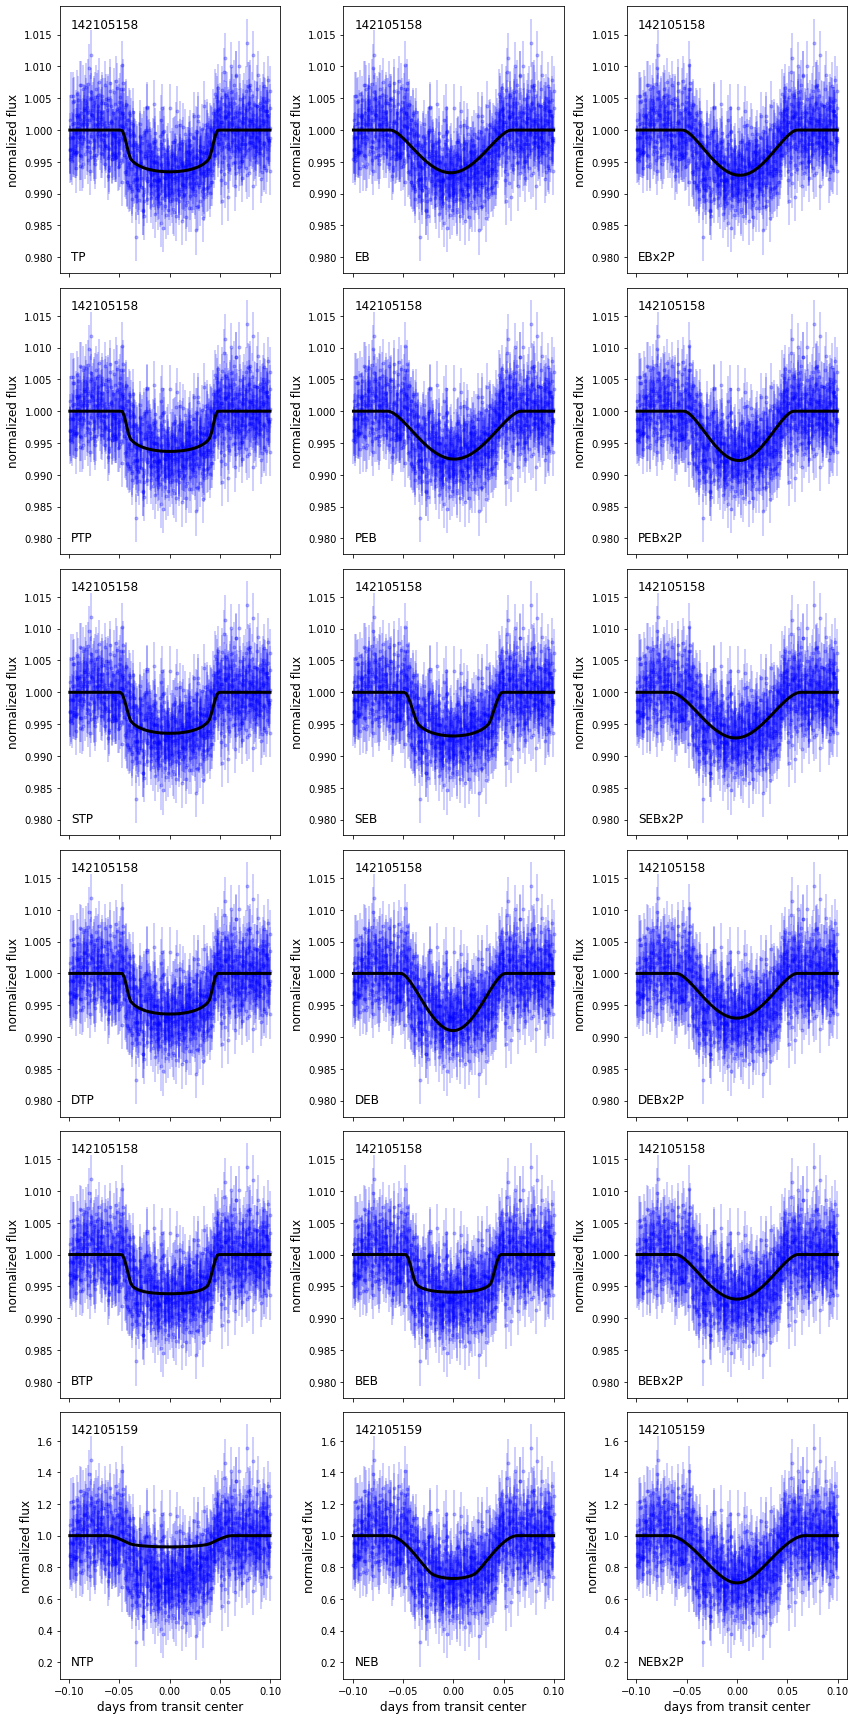

In [10]:
target.plot_fits(time=time, flux_0=flux, flux_err_0=np.mean(flux_err))